In [2]:
%load_ext memray
import numpy as np
import dask.array as da
from dask.distributed import Client
import dask
import ase
import matplotlib.pyplot as plt
import time
import abtem
import mkl_fft

In [3]:
abtem.config.set({"device": "cpu"})
abtem.config.set({"fft": "mkl"})
abtem.config.set({"mkl.threads": 1})

In [24]:
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 8,Total memory: 16.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:49386,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 8
Started: Just now,Total memory: 16.00 GiB
Comm: tcp://127.0.0.1:49397,Total threads: 2
Dashboard: http://127.0.0.1:49400/status,Memory: 4.00 GiB
Nanny: tcp://127.0.0.1:49389,


In [28]:
client.close()

In [8]:
abtem.Probe(
    energy=200e3, 
    semiangle_cutoff=20,
    extent=potential.extent,
    gpts=10000,
).build().array

dask.array<getitem, shape=(10000, 10000), dtype=complex64, chunksize=(10000, 10000), chunktype=numpy.ndarray>

In [69]:
for sub_scan in scan.generate_blocks(3):
    
    print(sub_scan)
    

((0, 0), (slice(0, 2, None), slice(0, 1, None)), <abtem.scan.GridScan object at 0x7ff1c88d3ee0>)
((0, 1), (slice(0, 2, None), slice(1, 2, None)), <abtem.scan.GridScan object at 0x7ff1c84eacb0>)
((0, 2), (slice(0, 2, None), slice(2, 3, None)), <abtem.scan.GridScan object at 0x7ff1c88d3ee0>)
((0, 3), (slice(0, 2, None), slice(3, 4, None)), <abtem.scan.GridScan object at 0x7ff2e677c7c0>)
((0, 4), (slice(0, 2, None), slice(4, 5, None)), <abtem.scan.GridScan object at 0x7ff1c88d3ee0>)
((0, 5), (slice(0, 2, None), slice(5, 6, None)), <abtem.scan.GridScan object at 0x7ff2e677c7c0>)
((0, 6), (slice(0, 2, None), slice(6, 7, None)), <abtem.scan.GridScan object at 0x7ff1c88d3ee0>)
((0, 7), (slice(0, 2, None), slice(7, 8, None)), <abtem.scan.GridScan object at 0x7ff2e677c7c0>)
((0, 8), (slice(0, 2, None), slice(8, 9, None)), <abtem.scan.GridScan object at 0x7ff1c88d3ee0>)
((0, 9), (slice(0, 2, None), slice(9, 10, None)), <abtem.scan.GridScan object at 0x7ff2e677c7c0>)
((0, 10), (slice(0, 2, None),

In [67]:
scan.shape

(15, 15)

In [66]:
%%memray_flamegraph

atoms = ase.build.bulk("Au", cubic=True) * (3,3,1)

potential = abtem.Potential(atoms, gpts=1000)

probe = abtem.Probe(
    energy=200e3, 
    semiangle_cutoff=20,
    extent=potential.extent,
    gpts=1000,
)

#wave = probe.build(lazy=False)

#propagator = abtem.multislice.FresnelPropagator()

#wave = propagator.propagate(wave, 200, overwrite_x=True)
#wave = propagator.propagate(wave, 200, overwrite_x=True)
#wave = propagator.propagate(wave, 200, overwrite_x=True)

#slice_generator = potential.generate_slices()

detector = abtem.AnnularDetector(inner=50, outer=150)

scan = abtem.GridScan(start=(0,0), end=(1/3,1/3), fractional=True, potential=potential)
scan.match_probe(probe)

#measurement = probe.scan(potential, detectors=detector, scan=scan).compute()

#exit_wave = abtem.multislice.multislice_and_detect(wave, potential)

Output()

Output()

Results saved to memray-results/tmppfbxkfew/flamegraph.html

(<Figure size 640x480 with 2 Axes>, <Axes: xlabel='x [Å]', ylabel='y [Å]'>)

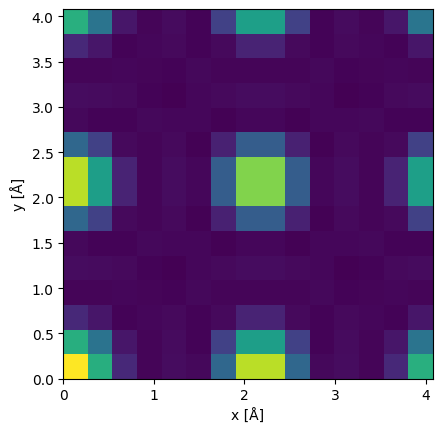

In [65]:
measurement.show()

In [7]:
%%memray_flamegraph

probe = abtem.Probe(
    energy=200e3, 
    semiangle_cutoff=20,
    extent=potential.extent,
    gpts=10000,
)#.compute()

probe = probe.build(lazy=False)

exit_wave = abtem.multislice.multislice_and_detect(probe, potential)

Output()

Output()

Results saved to memray-results/tmpxwh4g6d2/flamegraph.html

In [14]:
client = Client()
client

/opt/anaconda3/envs/abtem-dask/lib/python3.10/site-packages/distributed/node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 57637 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:57637/status,
Dashboard: http://127.0.0.1:57637/status,Workers: 4
Total threads: 8,Total memory: 16.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:57638,Workers: 4
Dashboard: http://127.0.0.1:57637/status,Total threads: 8
Started: Just now,Total memory: 16.00 GiB
Comm: tcp://127.0.0.1:57649,Total threads: 2
Dashboard: http://127.0.0.1:57652/status,Memory: 4.00 GiB
Nanny: tcp://127.0.0.1:57641,


In [17]:
client.close()

In [16]:
probe = abtem.Probe(
    energy=200e3, 
    semiangle_cutoff=20,
    extent=potential.extent,
    gpts=10000,
).build().compute()

#exit_wave = probe.multislice(potential)

#exit_wave.compute()

Task exception was never retrieved
future: <Task finished name='Task-17504' coro=<Client._gather.<locals>.wait() done, defined at /opt/anaconda3/envs/abtem-dask/lib/python3.10/site-packages/distributed/client.py:2122> exception=AllExit()>
Traceback (most recent call last):
  File "/opt/anaconda3/envs/abtem-dask/lib/python3.10/site-packages/distributed/client.py", line 2131, in wait
    raise AllExit()
distributed.client.AllExit
2022-12-21 17:25:19,725 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 2.85 GiB -- Worker memory limit: 4.00 GiB
2022-12-21 17:25:19,824 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/w

In [41]:
aperture = abtem.Aperture(
    energy=200e3, 
    semiangle_cutoff=20,
    extent=(20, 20),
    gpts=(1024,1024),)

aperture.evaluate(lazy=True).compute()

2022-12-21 15:52:23,652 - distributed.worker.memory - WARNING - Unmanaged memory use is high. This may indicate a memory leak or the memory may not be released to the OS; see https://distributed.dask.org/en/latest/worker-memory.html#memory-not-released-back-to-the-os for more information. -- Unmanaged memory: 2.85 GiB -- Worker memory limit: 4.00 GiB


array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]], dtype=float32)

In [50]:
%%memray_flamegraph

probe = abtem.Probe(
    energy=200e3, 
    semiangle_cutoff=20,
    extent=(10, 5),
    soft=True,
    gpts=(1000,1000),)

wave = probe.build(lazy=False)#.compute()

Output()

Output()

Results saved to memray-results/tmpq1nmbnj1/flamegraph.html

(<Figure size 640x480 with 2 Axes>, <Axes: xlabel='x [Å]', ylabel='y [Å]'>)

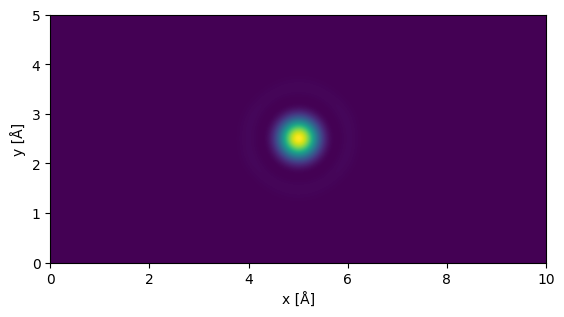

In [49]:
wave.show()

In [42]:
v=abtem.Probe(
    energy=200e3, 
    semiangle_cutoff=20,
    extent=(30, 30),
    gpts=(1000,1000),
).aberrations.aberration_coefficients.values()



True

Output()

Output()

Results saved to memray-results/tmp2wr_5q5o/flamegraph.html

(<Figure size 640x480 with 2 Axes>,
 <Axes: xlabel='kx [1 / Å]', ylabel='ky [1 / Å]'>)

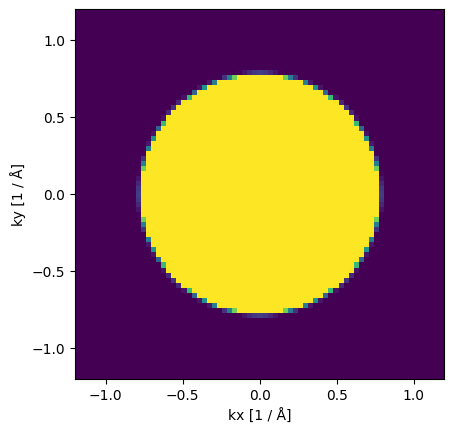

In [44]:
probe.diffraction_patterns(max_angle=30).show()

(<Figure size 640x480 with 2 Axes>,
 <Axes: xlabel='kx [1 / Å]', ylabel='ky [1 / Å]'>)

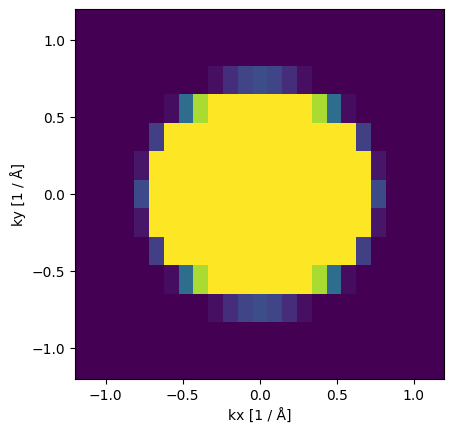

In [16]:
probe.diffraction_patterns(max_angle=30).show()

In [24]:
import gc

In [7]:
n = 32

def g():
    a = np.ones((n, 2048, 2048))
    time.sleep(2)
    b = np.ones((n, 2048, 2048))
    time.sleep(2)
    return b

def h():
    c = np.ones((n, 2048, 2048))
    time.sleep(2)
    d = np.ones((n, 2048, 2048))
    time.sleep(2)
    return d

def f():
    a = g()
    d = h()
    e = np.ones((n, 2048, 2048))
    return e


out = dask.delayed(f)()

out = da.from_delayed(out, shape=(n, 2048, 2048), dtype=float)

out.compute()

array([[[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]],

       ...,

       [[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1.